# Group EDA Project - Steam Dataset - Group 1

Armand's individual Python code

Import libraries first

In [1]:
#data handling
import pandas as pd
import numpy as np

#data viz
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

#utility and warnings just in case
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

#### Data loading and initial look at the structure

Let's load the dataset into a dataframe, check the structure, and preview to check for any missing values or potential data cleaning.

In [2]:
df = pd.read_csv("games_march2025_cleaned.csv")
#print out the structure of the dataset
df.shape

(89618, 47)

In [3]:
#looking at the first few rows of the dataset
df.head(5)

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,3.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,682,2434,306,80,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,1168020,76,12608


In [4]:
#looking for information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89618 entries, 0 to 89617
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     89618 non-null  int64  
 1   name                      89618 non-null  object 
 2   release_date              89618 non-null  object 
 3   required_age              89618 non-null  int64  
 4   price                     89618 non-null  float64
 5   dlc_count                 89618 non-null  int64  
 6   detailed_description      89421 non-null  object 
 7   about_the_game            89398 non-null  object 
 8   short_description         89498 non-null  object 
 9   reviews                   10401 non-null  object 
 10  header_image              89618 non-null  object 
 11  website                   41114 non-null  object 
 12  support_url               44110 non-null  object 
 13  support_email             78798 non-null  object 
 14  window

In [5]:
#describing the dataset
df.describe()

,appid,required_age,price,dlc_count,metacritic_score,achievements,recommendations,user_score,score_rank,positive,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
count,8.961800e+04,89618.000000,89618.000000,89618.000000,89618.000000,89618.000000,8.961800e+04,89618.000000,39.000000,8.961800e+04,...,8.961800e+04,89618.000000,8.961800e+04,89618.000000,89618.000000,8.961800e+04,89618.000000,8.961800e+04,89618.000000,89618.000000
mean,1.656904e+06,0.183624,7.309623,0.595583,2.903245,20.552333,1.009401e+03,0.032817,99.128205,1.269896e+03,...,1.149119e+02,5.032694,1.147559e+02,5.301814,4.558627,9.833994e+01,45.352418,1.315490e+03,5.231639,15.584581
std,9.168390e+05,1.725594,13.331073,15.351920,14.445358,163.562418,2.204815e+04,1.615149,0.695076,3.181441e+04,...,6.814748e+03,181.100334,8.806711e+03,189.591095,16.538036,5.717544e+03,40.685695,3.542370e+04,22.335358,444.277307
min,2.000000e+01,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,8.550525e+05,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,99.000000,1.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
50%,1.524730e+06,0.000000,4.990000,0.000000,0.000000,5.000000,0.000000e+00,0.000000,99.000000,1.000000e+01,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,60.000000,1.500000e+01,-1.000000,-1.000000
75%,2.430852e+06,0.000000,9.990000,0.000000,0.000000,20.000000,0.000000e+00,0.000000,100.000000,5.800000e+01,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,84.000000,8.100000e+01,-1.000000,-1.000000
max,3.542350e+06,21.000000,999.980000,3427.000000,97.000000,9821.000000,4.401572e+06,100.000000,100.000000,7.480813e+06,...,1.462997e+06,18568.000000,1.462997e+06,18568.000000,100.000000,1.212356e+06,100.000000,8.632939e+06,100.000000,96473.000000


#### Data cleaning and Wrangling
In this part, I'm gonna be checking for any missing values, duplicates, or any anomalies

In [6]:
#check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)

score_rank                  89579
metacritic_url              86071
reviews                     79217
notes                       72975
website                     48504
support_url                 45508
support_email               10820
about_the_game                220
detailed_description          197
short_description             120
estimated_owners                0
appid                           0
negative                        0
positive                        0
user_score                      0
movies                          0
average_playtime_forever        0
discount                        0
average_playtime_2weeks         0
median_playtime_forever         0
median_playtime_2weeks          0
genres                          0
peak_ccu                        0
tags                            0
pct_pos_total                   0
num_reviews_total               0
pct_pos_recent                  0
screenshots                     0
full_audio_languages            0
categories    

To be more specific and more in line with the scope of our project interest, we can check for missing/invalid values of the metrics that we are interested in

In [7]:
#check for null values in specific columns
df[["pct_pos_recent","num_reviews_recent","num_reviews_total",
    "estimated_owners","average_playtime_2weeks",
    "average_playtime_forever","peak_ccu"]].isnull().sum()

pct_pos_recent              0
num_reviews_recent          0
num_reviews_total           0
estimated_owners            0
average_playtime_2weeks     0
average_playtime_forever    0
peak_ccu                    0
dtype: int64

Alternatively, we can trim the dataset and create a new variable called "reduced_df" so we only need to focus on this specific dataframe

In [8]:
#keep only relevant columns for eda scope
reduced_df = df[[
    "appid", "name", "release_date", "price", "required_age", "dlc_count", 
    "pct_pos_recent", "num_reviews_recent", "num_reviews_total", "estimated_owners",
    "average_playtime_2weeks", "median_playtime_2weeks", "average_playtime_forever",
    "peak_ccu", "genres", "tags", "publishers", "windows", "mac", "linux"
]]

In [9]:
#alternatively, we can convert release_date to datetime
reduced_df["release_date"] = pd.to_datetime(reduced_df["release_date"])

#### Plotting and Visualizing the Data
Now that we've got a clean and reduced dataset, we have our metrics that we want to specifically focus on.

#### Reception Map (Scatterplot)

This scatterplot will visualize the relationship between recent review sentiment (pct_pos_recent) and volume of recent reviews (num_reviews_recent). This plot lets you see quality vs recent trending.


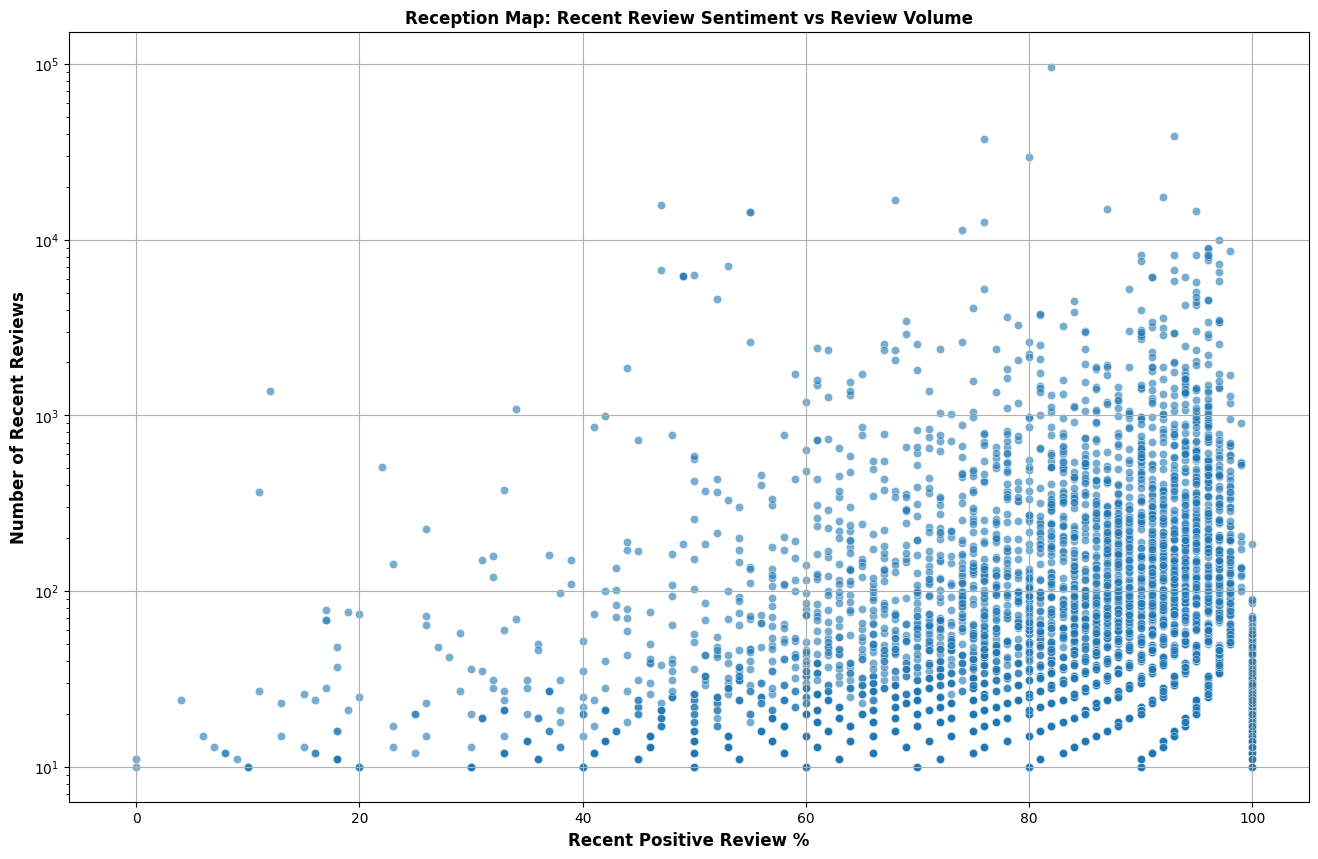

In [28]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    data=reduced_df, 
    x="pct_pos_recent", 
    y="num_reviews_recent", 
    alpha=0.6,
)
plt.title("Reception Map: Recent Review Sentiment vs Review Volume", fontsize=12, fontweight='bold')
plt.xlabel("Recent Positive Review %", fontsize=12, fontweight='bold')
plt.ylabel("Number of Recent Reviews", fontsize=12, fontweight='bold')
plt.yscale("log")  #log scale helps with wider range
plt.grid()
plt.show()

#### Genre Popularity using Barplot

The purpose of this is to visualize benchmark reach & engagement by genre (e.g., estimated_owners_num).
Since genres is multi-label, we’ll need to split and count appearances. This plot will tell us the most popular video game genres in steam.

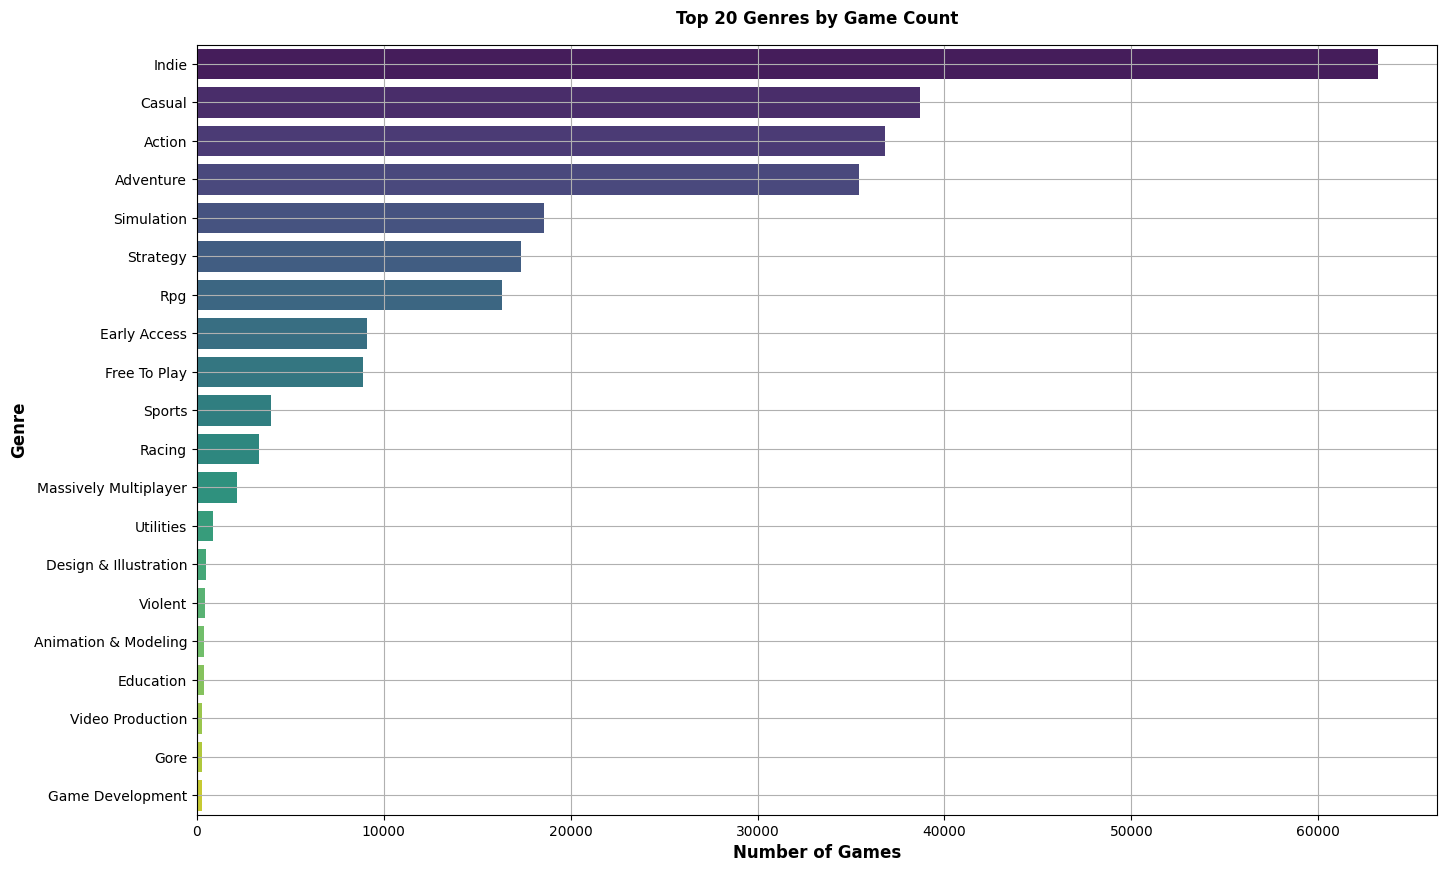

In [32]:
#Clean up genres before counting
genre_counts = (
    reduced_df["genres"].dropna()
    .str.split(",")
    .explode()
    .str.strip()  #remove leading/trailing spaces
    .str.replace(r"[\[\]']", "", regex=True)  #remove brackets/quotes
    .str.title()  # optional: standardize capitalization (e.g., "Action" not "action")
    .value_counts()
    .head(20)  # display the top 20 genres
)

#Plot the genre counts
plt.figure(figsize=(16,10))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 20 Genres by Game Count", fontsize=12, pad=15, fontweight='bold')
plt.xlabel("Number of Games", fontsize=12, fontweight='bold')
plt.ylabel("Genre", fontsize=12, fontweight='bold')
plt.grid()
plt.show()


#### Release Trends Over Time (Lineplot) with User sentiment

This is a mixed plot that shows industry output (supply) and player sentiment (reception) over time in one view. This plot may potentially reveal trends that show that more video game output and production might potentially cause worse user sentiment. This code extracts the release year, turns it into a datetime format, and then groups release year. User sentiment is extracted using the "pct_pos_recent" and then groups it by release year. In this plot, I've used twin axes to signify the number of games, and the percentage of average positive review.  

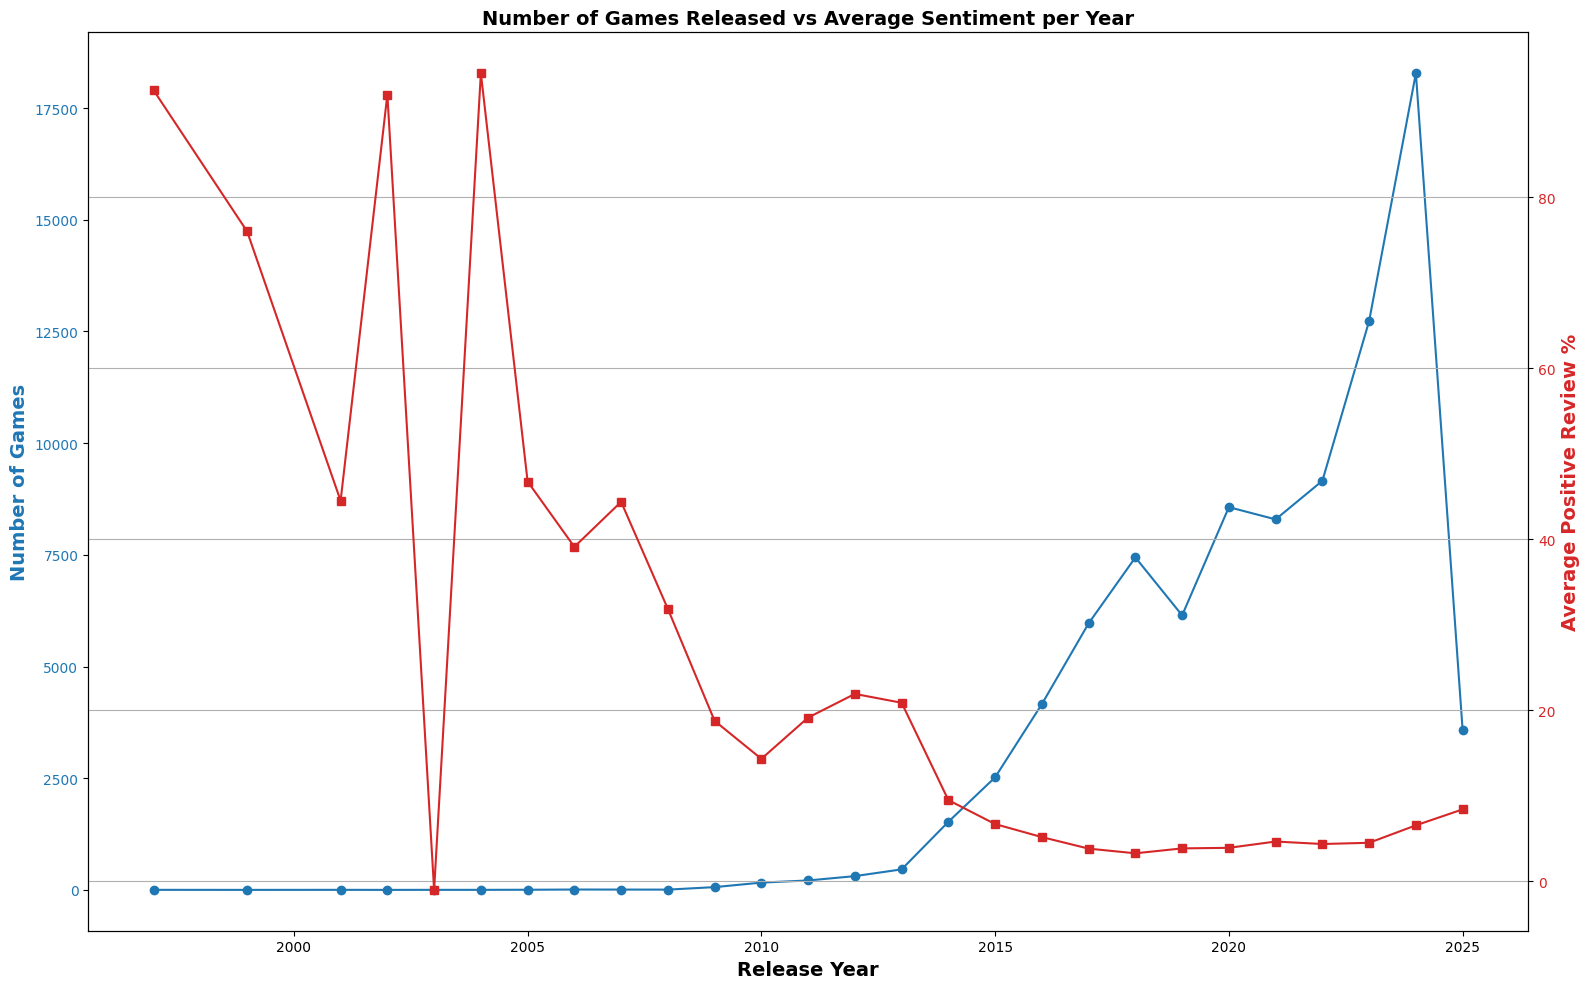

In [ ]:
#Extract release year
reduced_df["release_year"] = reduced_df["release_date"].dt.year

#Number of games released per year
games_per_year = reduced_df.groupby("release_year").size()

#Average sentiment per year
avg_sentiment_per_year = reduced_df.groupby("release_year")["pct_pos_recent"].mean()

#Plot both on same chart with secondary y-axis
fig, ax1 = plt.subplots(figsize=(16,10))

#first axis, number of games
ax1.plot(games_per_year.index, games_per_year.values, color="tab:blue", marker="o", label="Number of Games")
ax1.set_xlabel("Release Year", fontsize=14, fontweight='bold')
ax1.set_ylabel("Number of Games", color="tab:blue", fontsize=14, fontweight='bold')
ax1.tick_params(axis="y", labelcolor="tab:blue")

#Create secondary axis for sentiment
ax2 = ax1.twinx()
ax2.plot(avg_sentiment_per_year.index, avg_sentiment_per_year.values, color="tab:red", marker="s", label="Avg Sentiment (%)")
ax2.set_ylabel("Average Positive Review %", color="tab:red", fontsize=14, fontweight='bold')
ax2.tick_params(axis="y", labelcolor="tab:red")
plt.title("Number of Games Released vs Average Sentiment per Year", fontsize=14, fontweight='bold')
fig.tight_layout()
plt.grid()
plt.show()
